In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pricing import DiscountingCurve, EquityForwardCurve, Black
from montecarlo import Monte_Carlo_Analisys, MC, Monte_Carlo_Analisys_vector
import time, sys
from scipy.stats.mstats import gmean
from closedforms import GMAsian_closed_form, European_closed_form

In [16]:
spot_price = 150
strike = 150
reference = 0
zero_rate = 1/100
volatility = 20/100
maturity = 4.0
m = 100  #number of means before maturity
fixings = np.linspace(reference,maturity,m)
kind = 1  #+1 = Call option, -1 put option

discount_curve = DiscountingCurve(reference=reference, zero_rate=zero_rate)
forward = EquityForwardCurve(spot=spot_price, reference=reference, discounting_curve=discount_curve,
                             repo_rates=0, dividend_yelds=0)

B_model = Black(volatility=volatility, forward_curve=forward)

In [3]:
S_t = B_model.simulate(fixings=fixings, Nsim=2e6, seed=17)
G_mean = gmean(S_t,axis=1)

In [4]:
pay = B_model.Asian_PayOff(GM=G_mean,strike=strike, typo = kind)*discount_curve(maturity)
right = GMAsian_closed_form(m,spot_price,strike,maturity,zero_rate,0,volatility,kind)

In [5]:
x,mean,err = Monte_Carlo_Analisys_vector(pay,100)

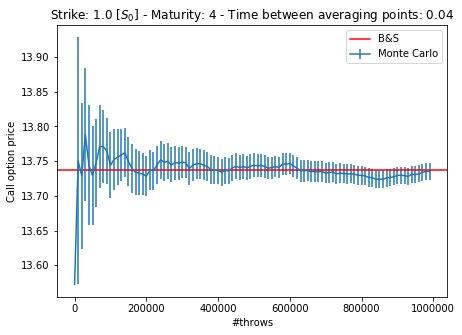

In [6]:
nu = fixings[1]-fixings[0]
plt.figure(figsize=(7,5))
plt.axhline(y=right, color = 'red',linestyle='-',label = 'B&S')
plt.errorbar(x,mean,yerr=err,label = 'Monte Carlo')
plt.xlabel('#throws')
plt.legend()
plt.title("Strike: "+str(strike/spot_price)+" [$S_0$] - Maturity: "+str(maturity)+" - Time between averaging points: "+str(round(nu,2)))
if kind==1:
    plt.ylabel('Call option price')
    plt.savefig('Graphs/Asian_call_option.pdf')
elif kind==-1:
    plt.ylabel('Put option price')
    plt.savefig('Graphs/Asian_put_option.pdf')
plt.show()

/home/ste/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


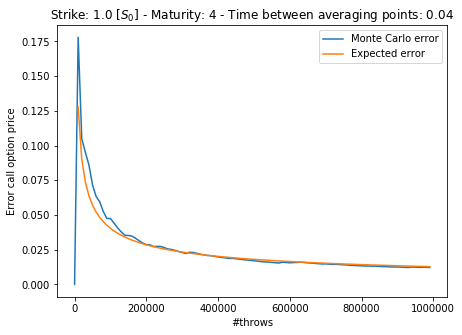

In [7]:
z = np.std(pay)
y = np.sqrt(x)
plt.figure(figsize=(7,5))
plt.plot(x,err, label = 'Monte Carlo error')
plt.plot(x,z/y, label = 'Expected error')
plt.xlabel("#throws")
plt.title("Strike: "+str(strike/spot_price)+" [$S_0$] - Maturity: "+str(maturity)+" - Time between averaging points: "+str(round(nu,2)))
plt.legend()
if kind==1:
    plt.ylabel('Error call option price')
    plt.savefig('Graphs/Error_asian_call_option.pdf')
elif kind==-1:
    plt.ylabel('Error put option price')
    plt.savefig('Graphs/Error_asian_put_option.pdf')

plt.show()

In [ ]:
x = np.arange(1,21)*10
media = np.zeros(len(x))
errore = np.zeros(len(x))
for i in range(len(x)):
    fixings = np.linspace(reference,maturity,x[i])
    S_t = B_model.simulate(fixings=fixings, Nsim=1e6, seed=2)
    G_mean = gmean(S_t,axis=1)
    pay = B_model.Asian_PayOff(GM=G_mean,strike=strike, typo = kind)*discount_curve(maturity)
    mean, err = MC(pay)
    media[i] = mean
    errore[i] = err
   
    
np.savetxt("Results/Asian_frequence.txt",media)
np.savetxt("Results/Asian_frequence_err.txt",errore)
np.savetxt("Results/frequence_asian.txt",x)

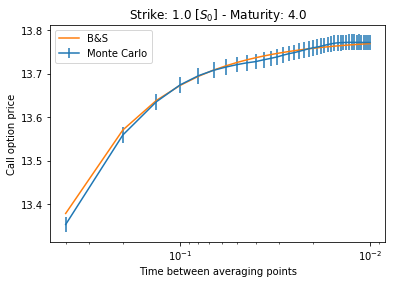

In [17]:
x = np.loadtxt("Results/frequence_asian.txt")
media = np.loadtxt("Results/Asian_frequence.txt")
errore = np.loadtxt("Results/Asian_frequence_err.txt")
nu = maturity/x
closed = GMAsian_closed_form(x,spot_price,strike,maturity,zero_rate,0,volatility,kind)
plt.errorbar(nu,media,yerr=errore, label = 'Monte Carlo')
plt.plot(nu,closed,label='B&S')
plt.xlabel('Time between averaging points')
plt.gca().invert_xaxis()
plt.title("Strike: "+str(strike/spot_price)+" [$S_0$] - Maturity: "+str(maturity))
plt.xscale("Log")
plt.legend()
if kind==1:
    plt.ylabel('Call option price')
    plt.savefig('Graphs/Asian_call_number.pdf')
elif kind==-1:
    plt.ylabel('Put option price')
    plt.savefig('Graphs/Asian_put_number.pdf')
plt.show()


In [9]:
x = np.arange(1,51)*(spot_price*0.25)
m = 100  #number of means before maturity
maturity = 4.0
fixings = np.linspace(reference,maturity,m)
media = np.zeros(len(x))
errore = np.zeros(len(x))
S_t = B_model.simulate(fixings=fixings, Nsim=1e6, seed=2)
G_mean = gmean(S_t,axis=1)
for i in range(len(x)):
    pay = B_model.Asian_PayOff(GM=G_mean,strike=x[i], typo = kind)*discount_curve(maturity)
    mean, err = MC(pay)
    media[i] = mean
    errore[i] = err

np.savetxt("Results/Asian_strike.txt",media)
np.savetxt("Results/Asian_strike_err.txt",errore)
np.savetxt("Results/strike_asian.txt",x)

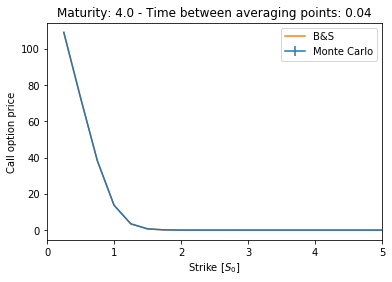

In [10]:
x = np.loadtxt("Results/strike_asian.txt")
media = np.loadtxt("Results/Asian_strike.txt")
errore = np.loadtxt("Results/Asian_strike_err.txt")
closed = GMAsian_closed_form(m,spot_price,x,maturity,zero_rate,0,volatility,kind)
plt.errorbar(x/spot_price,media,yerr=errore, label = 'Monte Carlo')
plt.plot(x/spot_price,closed,label='B&S')
plt.xlabel('Strike [$S_0$]')
plt.title("Maturity: "+str(maturity)+" - Time between averaging points: "+str(round(maturity/m,2)))
plt.xlim(0,5)
plt.legend()
if kind==1:
    plt.ylabel('Call option price')
    plt.savefig('Graphs/Asian_call_strike.pdf')
elif kind==-1:
    plt.ylabel('Put option price')
    plt.savefig('Graphs/Asian_put_strike.pdf')
plt.show()


In [11]:
x = np.arange(1,41)*0.25
media = np.zeros(len(x))
errore = np.zeros(len(x))
for i in range(len(x)):
    fixings = np.linspace(reference,x[i],m)
    S_t = B_model.simulate(fixings=fixings, Nsim=1e6, seed=2)
    G_mean = gmean(S_t,axis=1)
    pay = B_model.Asian_PayOff(GM=G_mean,strike=strike, typo = kind)*discount_curve(x[i])
    mean, err = MC(pay)
    media[i] = mean
    errore[i] = err
   
np.savetxt("Results/Asian_maturity.txt",media)
np.savetxt("Results/Asian_maturity_err.txt",errore)
np.savetxt("Results/maturity_asian.txt",x)

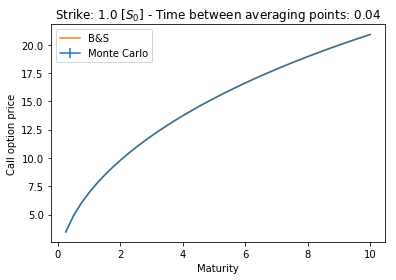

In [12]:
x = np.loadtxt("Results/maturity_asian.txt")
media = np.loadtxt("Results/Asian_maturity.txt")
errore = np.loadtxt("Results/Asian_maturity_err.txt")
closed = GMAsian_closed_form(m,spot_price,strike,x,zero_rate,0,volatility,kind)
plt.errorbar(x,media,yerr=errore, label = 'Monte Carlo')
plt.plot(x,closed,label='B&S')
plt.xlabel('Maturity')
plt.title("Strike: "+str(strike/spot_price)+" [$S_0$] - Time between averaging points: "+str(round(maturity/m,2)))
plt.legend()
if kind==1:
    plt.ylabel('Call option price')
    plt.savefig('Graphs/Asian_call_maturity.pdf')
elif kind==-1:
    plt.ylabel('Put option price')
    plt.savefig('Graphs/Asian_put_maturity.pdf')
plt.show()

### Asian VS European

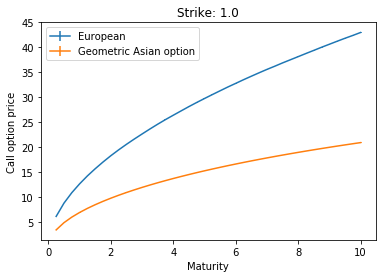

In [14]:
x = np.loadtxt("Results/maturity_asian.txt")
media = np.loadtxt("Results/Asian_maturity.txt")
errore = np.loadtxt("Results/Asian_maturity_err.txt")
euro = np.loadtxt("Results/European_call_maturity.txt")
euro_err = np.loadtxt("Results/European_call_err_maturity.txt")
plt.errorbar(x,euro,yerr=euro_err, label = 'European')
plt.errorbar(x,media,yerr=errore, label = 'Geometric Asian option')
plt.xlabel('Maturity')
plt.title("Strike: "+str(strike/spot_price))
plt.legend()
if kind==1:
    plt.ylabel('Call option price')
    plt.savefig('Graphs/Asian_euro_call_maturity.pdf')
elif kind==-1:
    plt.ylabel('Put option price')
    plt.savefig('Graphs/Asian_euro_put_maturity.pdf')
plt.show()

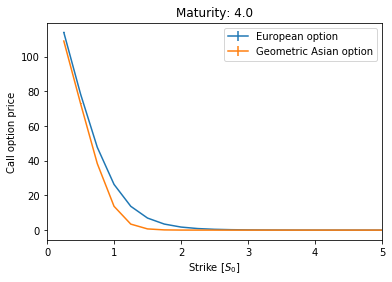

In [15]:
x = np.loadtxt("Results/strike_asian.txt")
media = np.loadtxt("Results/Asian_strike.txt")
errore = np.loadtxt("Results/Asian_strike_err.txt")
euro = np.loadtxt("Results/European_call_strike.txt")
euro_err = np.loadtxt("Results/European_call_err_strike.txt")

plt.errorbar(x/spot_price,euro,yerr=euro_err, label = 'European option')
plt.errorbar(x/spot_price,media,yerr=errore, label = 'Geometric Asian option')
plt.xlabel('Strike [$S_0$]')
plt.title("Maturity: "+str(maturity))
plt.xlim(0,5)
plt.legend()
if kind==1:
    plt.ylabel('Call option price')
    plt.savefig('Graphs/Asian_euro_call_strike.pdf')
elif kind==-1:
    plt.ylabel('Put option price')
    plt.savefig('Graphs/Asian_euro_put_strike.pdf')
plt.show()